In [3]:
import numpy as np

def sum_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

t = np.array([0, 0, 1, 0, 0, 0, 0, 0,0,0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print((sum_squared_error(y, t)))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(sum_squared_error(y, t))

0.09750000000000003
0.5975


In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * (np.log(y + delta)))

t = np.array([0, 0, 1, 0, 0, 0, 0, 0,0,0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print((cross_entropy_error(y, t)))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(cross_entropy_error(y, t))

0.510825457099338
2.302584092994546


In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

x_batch.shape, t_batch.shape

((10, 784), (10, 10))

In [13]:
np.random.choice(60000, 10)

array([25628, 11663, 32160, 16550, 46452, 17763, 28492, 47420, 29160,
       24888])

In [29]:
# label이 one-hot encoding일때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / batch_size

# label이 숫자 레이블로 주어졌을 때
def cross_entropy_error02(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [30]:
# 미분 나쁜 구현의 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(h)) / h

In [31]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [32]:
def function_1(x):
    return 0.01 * x**2 + 0.1*x

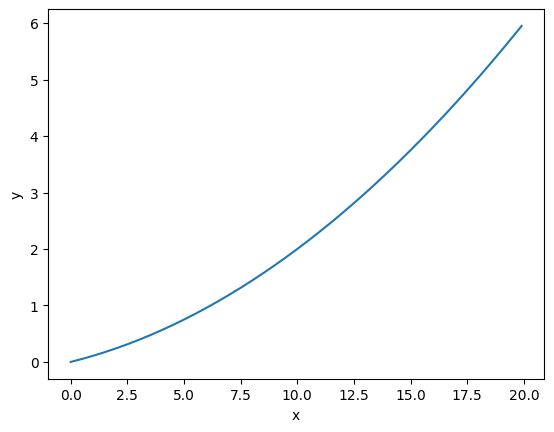

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [34]:
numerical_diff(function_1, 5)

0.1999999999990898

In [35]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


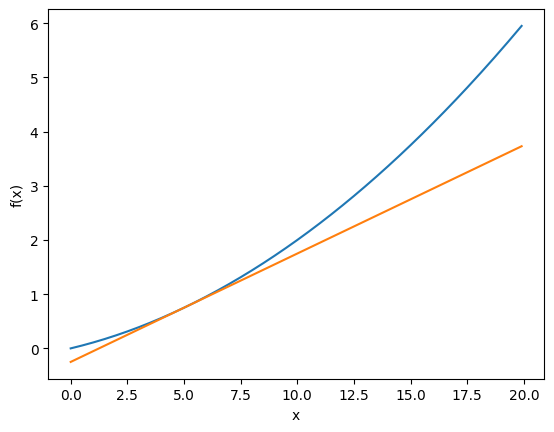

In [36]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [38]:
# 편미분
def function_2(x):
    return x[0]**2 + x[1]**2



In [43]:
# x0=3, x1=4일때 x0에 대한 편미분
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [44]:
def function_tmp2(x1):
    return 3.0**2.0 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119